In [1]:
# import the experiment utilities package
import exputils as eu
import numpy as np

# define what data should be loaded and some extra statistics that should be computed                
loader_config = eu.AttrDict(
    load_experiment_data_function = eu.AttrDict(
        pre_allowed_data_filter = [
            'rollout_ep_',
        ],
    )
)       
                
# create an experiment data loader, by default it will load data from '../experiments'
experiment_data_loader = eu.gui.jupyter.ExperimentDataLoaderWidget(config=loader_config)
display(experiment_data_loader)

ExperimentDataLoaderWidget(children=(Box(children=(Button(description='Update Descriptions', layout=Layout(hei…

In [2]:
import numpy as np
import matplotlib
def average_reward_over_time(file):
    # read the data from the .npy file
    data = np.load(file, allow_pickle = True)
    # min-max normalize the data
    data = (data + 200) / (200 - 11)
    # calculate the area under the curve of data against time
    area = np.trapz(data, dx = 1)
    # calculate the normalized area under the curve
    norm_area = area / data.shape[0]
    # map it to [0,1], given the range of the data is [-12, -200]
    return norm_area


In [3]:
def reward_over_entire_training(file):
    data = np.load(file, allow_pickle = True)
    #data = data[-1:]
    sum_data = data.sum()
    normalized_sum = sum_data / data.shape[0]
    return normalized_sum
        

In [4]:
def count_params(file):
    data = np.load(file, allow_pickle = True)
    return data

In [6]:
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'rliable'

In [11]:
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "023351",
        "023361",
        "023371",
        "020361",
        "020351",
        #"020341",
        #"020461",
        #"020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111111",
        "111121",
        "111131",
        "111231",
        "111331",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

experiment_ids_mrbf = [
    "311111",
    "311121",
    "311131",
]


# MLP
results_mlp_mean = []
results_mlp_std = []
results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    params_mlp.append(param)
    results_mlp.append(avg_return)
    avg_return_mlp = [ret  for ret in avg_return]
    results_mlp_mean.append(np.mean(avg_return_mlp))
    results_mlp_std.append(np.std(avg_return_mlp))
    print(f"{np.mean(avg_return_mlp):0.3f} ({np.std(avg_return_mlp):0.3f}) (params: {param})")
print(params_mlp, results_mlp_mean)

#RBF
results_urbf = []
results_rbf_mean = []
results_rbf_std = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_urbf.append(avg_return)
    params.append(param)
    avg_return = [ret  for ret in avg_return]
    results_rbf_mean.append(np.mean(avg_return))
    results_rbf_std.append(np.std(avg_return))
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")
    
    
    
    # MRBF
results_mrbf = []
results_mrbf_mean = []
results_mrbf_std = []
params_mrbf = []


for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_mrbf.append(avg_return)
    params_mrbf.append(param)
    avg_return = [ret  for ret in avg_return]
    results_mrbf_mean.append(np.mean(avg_return))
    results_mrbf_std.append(np.std(avg_return))
    print(f"{np.mean(avg_return):0.3f} ({np.std(avg_return):0.3f}) (params: {param})")


023351
4.384 (2.016) (params: 5140)
023361
4.983 (1.937) (params: 9252)
023371
4.789 (1.708) (params: 17476)
020361
0.510 (1.258) (params: 34952)
020351
1.890 (1.432) (params: 34952)
[5140, 9252, 17476, 34952, 34952] [4.383987961273194, 4.982879936828613, 4.789484082031249, 0.5103000061035156, 1.8903499713897705]
111111
6.456 (0.647) (params: 14968)
111121
6.735 (0.180) (params: 19820)
111131
6.671 (0.208) (params: 11596)
111231
5.908 (0.549) (params: 10296)
111331
3.492 (1.802) (params: 9776)
311111
-6.942 (10.617) (params: 5140)
311121
-1.012 (2.549) (params: 17476)
311131
-0.870 (3.048) (params: 9252)


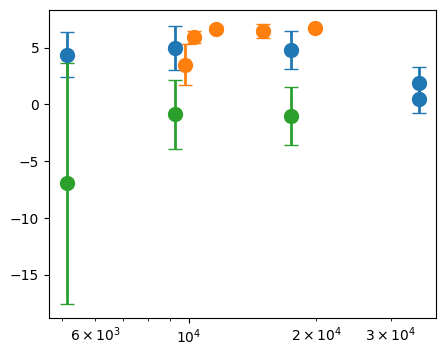

In [12]:
# plot the results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 4))
plt.xscale("log")
# plot the results both mean and std
plt.errorbar(params_mlp, results_mlp_mean, yerr=results_mlp_std, label='MLP', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params, results_rbf_mean, yerr=results_rbf_std, label='URBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_mrbf, results_mrbf_mean, yerr=results_mrbf_std, label='MRBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
#plt.xlabel('Number of parameters')
#plt.ylabel('Average return')
plt.rcParams.update({'font.size': 15})
plt.savefig("error_barsxy_1_mrbf.pdf", format="pdf", bbox_inches="tight")

In [20]:
import numpy
def avg(list):
    return sum(list) / len(list)

# UTEST FOR EXPERIMENT 1
from scipy.stats import mannwhitneyu
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "023351", #16
        "023361", # 32
        "023371", # 64
        #"020361", 
        #"020351",
        #"020341",
        #"020461",
        #"020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111111", # 16
        "111131", # 32
        "111121", # 64
        #"111231",
        #"111331",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

experiment_ids_mrbf = [
    "311111",
    "311131",
    "311121",
]

results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    params_mlp.append(param)
    results_mlp.append(avg_return)
    avg_return = np.array(avg_return)
    print("{}({})".format(np.mean(avg_return), np.std(avg_return)))

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    results_urbf.append(avg_return)
    print("{}({})".format(np.mean(avg_return), np.std(avg_return)))

results_mrbf = []
params = []
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    results_mrbf.append(avg_return)
    print("{}{}({})".format(ids, np.round(np.mean(avg_return),2), np.round(np.std(avg_return), 2)))


for i in range(3):
    print(i, mannwhitneyu(results_mlp[i], results_urbf[i])[1])

4.383987961273194(2.0155049181158877)
4.982879936828613(1.9371383116674885)
4.789484082031249(1.7077248361531154)
6.4555899609375(0.6472400444678558)
6.671429882812501(0.2082672253865312)
6.7345519140625(0.1803794961358814)
311111-6.94(10.62)
311131-0.87(3.05)
311121-1.01(2.55)
0 0.009108496398030965
1 0.004586392080253494
2 0.00728455700947966


In [14]:
print(avg_return_mlp, avg_return_rbf)
print(len(avg_return_mlp), len(avg_return_rbf))
from scipy.stats import mannwhitneyu
results = mannwhitneyu(avg_return_mlp, avg_return_rbf)
print(results)

[1.4202000732421876, 2.484800048828125, 2.689, -0.11760000610351562, 2.384250244140625, 4.46119970703125, 0.05845000076293945, 0.08560003662109375, 2.2640498046875, 3.1735498046875] [-0.342939990234375, 5.582440234375, 4.309140234375, 5.083200390625, 5.10796015625, 4.347219921875, 1.06640009765625, 3.347119921875, 2.58476015625, 3.83246015625]
10 10
MannwhitneyuResult(statistic=24.0, pvalue=0.053902557169387175)


In [57]:
# level 2
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "020392",
        "020382",
        "020372",
        "020362",
        "020352",
        "023462",
        "023472",
        #"020461",
        #"020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111112",
        "111122",
        "111132",
        "111232",
        "111332",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]


experiment_ids_mrbf = [
    "311112",
    "311122",
    "311132",
]


params_mlp2 = []
results_mlp_mean2 = []
results_mlp_std2 = []
results_rbf_mean2 = []
results_rbf_std2 = []
params_rbf2 = []

# MLP
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = count_params(file1)
    avg_return_mlp_2 = [ret for ret in avg_return]
    params_mlp2.append(param)
    results_mlp_std2.append(np.std(avg_return_mlp_2))
    results_mlp_mean2.append(np.mean(avg_return_mlp_2))
    print(f"{np.mean(avg_return_mlp_2):0.3f} ({np.std(avg_return_mlp_2):0.3f}) (params: {param}) ")

# U-RBF
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    avg_return_urbf_2 = [ret  for ret in avg_return]
    param = count_params(file1)
    params_rbf2.append(param)
    results_rbf_mean2.append(np.mean(avg_return_urbf_2))
    results_rbf_std2.append(np.std(avg_return_urbf_2))
    
    print(f"{np.mean(avg_return_urbf_2):0.3f} ({np.std(avg_return_urbf_2):0.3f}) (params: {param})")
    
    
    
# MRBF
results_mrbf2 = []
results_mrbf_mean2 = []
results_mrbf_std2 = []
params_mrbf2 = []

    
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_mrbf2.append(avg_return)
    params_mrbf2.append(param)
    avg_return_mrbf_2 = [ret  for ret in avg_return]
    results_mrbf_mean2.append(np.mean(avg_return))
    results_mrbf_std2.append(np.std(avg_return))
    print(f"{np.mean(avg_return_mrbf_2):0.3f} ({np.std(avg_return_mrbf_2):0.3f}) (params: {param})")



020392
2.088 (2.217) (params: [7710]) 
020382
1.689 (2.265) (params: [4612]) 
020372
3.854 (2.268) (params: [17476]) 
020362
4.502 (1.736) (params: [9252]) 
020352
2.365 (2.212) (params: [5140]) 
023462
4.322 (0.924) (params: [36900]) 
023472
3.592 (1.416) (params: [266244]) 
111112
6.417 (0.285) (params: [7484])
111122
6.125 (0.541) (params: [19820])
111132
6.011 (0.494) (params: [11596])
111232
5.026 (0.865) (params: [10296])
111332
1.216 (1.747) (params: [9776])
311112
-8.852 (21.305) (params: 5140)
311122
-1.393 (2.560) (params: 17476)
311132
-1.192 (1.940) (params: 9252)


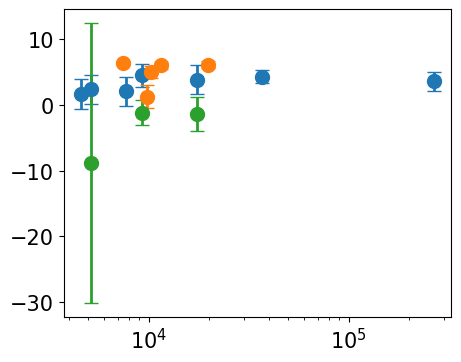

In [58]:

# plot the results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 4))
# plot the results both mean and std
# draw the x axis in log scale
plt.xscale("log")
plt.errorbar(params_mlp2, results_mlp_mean2, yerr=results_mlp_std2, label='MLP', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_rbf2, results_rbf_mean2, yerr=results_rbf_std2, label='URBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_mrbf2, results_mrbf_mean2, yerr=results_mrbf_std2, label='MRBF', fmt='o', capsize=5, elinewidth=2, markersize=10)

#plt.xlabel('Number of parameters')
#plt.ylabel('Average return')
plt.rcParams.update({'font.size': 15})
plt.savefig("error_barsxy_2_mrbf.pdf", format="pdf", bbox_inches="tight")

In [21]:
# UTEST FOR EXPERIMENT 2
from scipy.stats import mannwhitneyu
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        #"020392",
        #"020382",
        "020352",
        "020362",
        "020372",
        #"023462",
        #"023472",
        #"020461",
        #"020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "111112",
        "111122",
        "111132",
        #"111232",
        #"111332",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

experiment_ids_mrbf = [
    "311112",
    "311132",
    "311122",
]



results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    params_mlp.append(param)
    results_mlp.append(avg_return)

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    results_urbf.append(avg_return)
    
results_mrbf = []
params = []
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    results_mrbf.append(avg_return)
    print("{}{}({})".format(ids, np.round(np.mean(avg_return),2), np.round(np.std(avg_return), 2)))

for i in range(3):
    print(i, mannwhitneyu(results_mlp[i], results_urbf[i])[1])

311112-8.85(21.31)
311132-1.19(1.94)
311122-1.39(2.56)
0 0.00018267179110955002
1 0.004586392080253494
2 0.03763531378731424


In [16]:
print(avg_return_mlp, avg_return_rbf)
print(len(avg_return_mlp), len(avg_return_rbf))
from scipy.stats import mannwhitneyu
results = mannwhitneyu(avg_return_mlp, avg_return_rbf)
print(results)

[4.679240234375, 2.808319921875, 1.93433984375, 5.4760203125, 2.1122201171875, 1.66103984375, 3.54353984375, 5.172780078125, 3.116540234375, 5.413819921875] [-0.42982001953125, -0.37567998046875, 2.4652, -0.630239990234375, -0.007619970703125, 0.9561599609375, 3.552480078125, -0.4111599609375, 3.525059765625, 3.51616015625]
10 10
MannwhitneyuResult(statistic=81.0, pvalue=0.0211339281291611)


In [5]:
# level 3
scores = {}
algorithm = ['mlp', 'urbf', 'mrbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        "023393",
        "023383",
        "023373",
        "023363",
        "023353",
        "023463",
        "023473",
        #"020461",
        #"020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "113113",
        "113123",
        "113133",
        "113233",
        "113333",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]


experiment_ids_mrbf = [
    "313113",
    "313123",
    "313133",
]

results_mlp_mean3 = []
results_mlp_std3 = []
params_mlp3 = []
results_rbf_mean3 = []
results_rbf_std3 = []
params_rbf3 = []

for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    avg_return_mlp_3 = [ret  for ret in avg_return]
    param = count_params(file1)
    params_mlp3.append(param)
    results_mlp_mean3.append(np.mean(avg_return_mlp_3))
    results_mlp_std3.append(np.std(avg_return_mlp_3))
    print(f"{np.mean(avg_return_mlp_3):0.3f} ({np.std(avg_return_mlp_3):0.3f}) (params: {param}) ")
    
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    avg_return_urbf_3 = [ret for ret in avg_return]
    param = count_params(file1)
    params_rbf3.append(param)
    results_rbf_mean3.append(np.mean(avg_return_urbf_3))
    results_rbf_std3.append(np.std(avg_return_urbf_3))
    print(f"{np.mean(avg_return_urbf_3):0.3f} ({np.std(avg_return_urbf_3):0.3f}) (params: {param})")
    
    
    
    
# MRBF
results_mrbf3 = []
results_mrbf_mean3 = []
results_mrbf_std3 = []
params_mrbf3 = []

    
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    print(ids)
    param = int(count_params(file1))
    results_mrbf3.append(avg_return)
    params_mrbf3.append(param)
    avg_return_mrbf_3 = [ret  for ret in avg_return]
    results_mrbf_mean3.append(np.mean(avg_return))
    results_mrbf_std3.append(np.std(avg_return))
    print(f"{np.mean(avg_return_mrbf_3):0.3f} ({np.std(avg_return_mrbf_3):0.3f}) (params: {param})")




023393
1.974 (2.211) (params: [7710]) 
023383
0.994 (1.750) (params: [4612]) 
023373
1.972 (1.830) (params: [17476]) 
023363
2.284 (2.386) (params: [9252]) 
023353
1.454 (2.042) (params: [5140]) 
023463
2.525 (2.031) (params: [36900]) 
023473
1.816 (1.687) (params: [266244]) 
113113
4.839 (0.603) (params: [7484])
113123
4.078 (1.891) (params: [19820])
113133
4.602 (1.791) (params: [11596])
113233
1.567 (1.827) (params: [10296])
113333
0.570 (1.522) (params: [9776])
313113
-4.670 (6.833) (params: 5140)
313123
-0.831 (0.839) (params: 17476)
313133
-1.734 (3.580) (params: 9252)


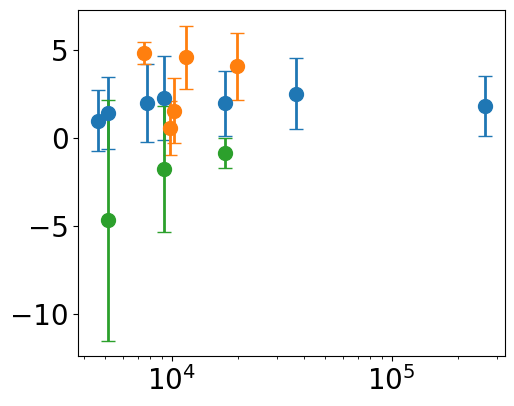

In [10]:
# plot the results
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5.5, 4.5))
# plot the results both mean and std
# draw the x axis in log scale
plt.xscale("log")
plt.errorbar(params_mlp3, results_mlp_mean3, yerr=results_mlp_std3, label='MLP', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_rbf3, results_rbf_mean3, yerr=results_rbf_std3, label='URBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.errorbar(params_mrbf3, results_mrbf_mean3, yerr=results_mrbf_std3, label='MRBF', fmt='o', capsize=5, elinewidth=2, markersize=10)
#plt.xlabel('Number of parameters')
#plt.ylabel('Average return')
plt.rcParams.update({'font.size': 24})
#plt.legend(loc='lower right')
plt.savefig("error_barsxy_3_mrbf.pdf", format="pdf", bbox_inches="tight")

In [22]:
# UTEST FOR EXPERIMENT 2
from scipy.stats import mannwhitneyu
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        #"020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",
        #"023393",
        #"023383",
        "023353",
        "023363",
        "023373",
        #"023463",
        #"023473",
        #"020461",
        #"020471",
]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        "113113",
        "113123",
        "113133",
        #"113233",
        #"113333",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        #"111211",
]

experiment_ids_mrbf = [
    "313113",
    "313133",
    "313123",
]



results_mlp = []
params_mlp = []
for ids in experiment_ids_mlp:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    params_mlp.append(param)
    results_mlp.append(avg_return)

results_urbf = []
params = []
for ids in experiment_ids_urbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    results_urbf.append(avg_return)
    
results_mrbf = []
params = []
for ids in experiment_ids_mrbf:
    avg_return = []
    param = 0
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            file1 = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/learnable_params.npy'
            avg_return.append(reward_over_entire_training(file))
        except:
            #data_arr.append(data[-1])
            print("repetition not found")
    param = int(count_params(file1))
    results_mrbf.append(avg_return)
    print("{}{}({})".format(ids, np.round(np.mean(avg_return),2), np.round(np.std(avg_return), 2)))

for i in range(3):
    print(i, mannwhitneyu(results_mlp[i], results_urbf[i])[1])

313113-4.67(6.83)
313133-1.73(3.58)
313123-0.83(0.84)
0 0.0028272720911168077
1 0.07566157214388704
2 0.004586392080253494


In [18]:
print(avg_return_mlp, avg_return_rbf)
print(len(avg_return_mlp), len(avg_return_rbf))
from scipy.stats import mannwhitneyu
results = mannwhitneyu(avg_return_mlp, avg_return_rbf)
print(results)

[3.96193984375, 4.3135796875, 2.0338, -0.171480029296875, 0.563860009765625, 1.361480078125, 0.5347, 1.43357998046875, 4.29316015625, -0.1603400390625] [-0.4725, 4.379859765625, -0.36977998046875, -0.457560009765625, -0.3769, 1.117719921875, 2.0462798828125, -0.50807998046875, -0.44577998046875, 0.78390009765625]
10 10
MannwhitneyuResult(statistic=75.0, pvalue=0.06402210128302689)


In [13]:
scores = {}
algorithm = ['mlp', 'urbf']
data_arr = []
experiment_ids_mlp = [
        #"020102",
        #"020302",
        #"020402",
        #"020502",
        #"020001",
        "020301",
        #"111211",
        #"020401",
        #"020103",
        #"020303",
        #"020403",
        #"020503",

]
experiment_ids_urbf = [
        #"111012",
        #"111112",
        #"111312",
        #"111412",
        #"111011",
        #"111111",
        #"111311",
        #"111013",
        #"111113",
        #"111313",
        #"111413",
        "111211",
]

for ids in experiment_ids_mlp:
    for j in range(10):
        try:
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000'+ str(j) + '/data/reward_per_timestep.npy'
            print(file)
            data = np.load(file, allow_pickle=True)
            area = np.trapz(data, dx = 1)
            print(area)
        except:
            #data_arr.append(data[-1])
            print("repetition not found")


../experiments/experiment_020301/repetition_000000/data/reward_per_timestep.npy
-317.54996
../experiments/experiment_020301/repetition_000001/data/reward_per_timestep.npy
213.84998
../experiments/experiment_020301/repetition_000002/data/reward_per_timestep.npy
2451.8003
../experiments/experiment_020301/repetition_000003/data/reward_per_timestep.npy
-433.4
../experiments/experiment_020301/repetition_000004/data/reward_per_timestep.npy
-300.54996
../experiments/experiment_020301/repetition_000005/data/reward_per_timestep.npy
102.09998
../experiments/experiment_020301/repetition_000006/data/reward_per_timestep.npy
-488.55
../experiments/experiment_020301/repetition_000007/data/reward_per_timestep.npy
633.0
../experiments/experiment_020301/repetition_000008/data/reward_per_timestep.npy
-109.64998
../experiments/experiment_020301/repetition_000009/data/reward_per_timestep.npy
-157.44998


In [12]:
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  scores, aggregate_func, reps=50000)
fig, axes = plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
  algorithms=algorithm, xlabel='Human Normalized Score')


NameError: name 'rly' is not defined

<AxesSubplot: xlabel='P(X > Y)', ylabel='Algorithm X'>

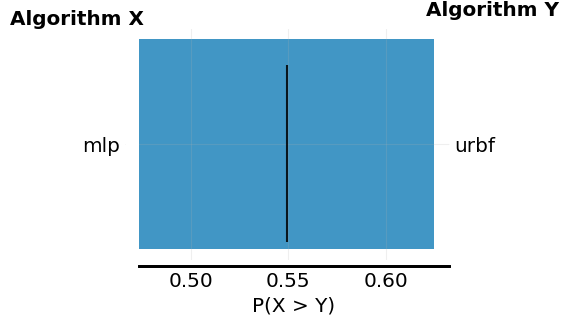

In [67]:
procgen_algorithm_pairs = {'mlp,urbf': (scores['mlp'], scores['urbf'])}
average_probabilities, average_prob_cis = rly.get_interval_estimates(
  procgen_algorithm_pairs, metrics.probability_of_improvement, reps=2000)
plot_utils.plot_probability_of_improvement(average_probabilities, average_prob_cis)


In [85]:
    # URBF Level 3
    average_reward_list = []
    experiment_ids = [
        "111013",
        "111113",
        "111313",
        "111413",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            try:
                average_reward_list.append(average_reward_over_time(file))
            except:
                continue
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

011013
0.6637 (0.112)
111013
0.6830 (0.118)
111113
0.5864 (0.141)
111313
0.6241 (0.143)
111413
0.6729 (0.148)


In [89]:
    # MLP Level 1
    average_reward_list = []
    experiment_ids = [
        "020001",
        "020301",
        "020401",
        "020501",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

020001
0.9365 (0.005)
020301
0.9271 (0.009)
020401
0.9234 (0.017)
020501
0.9289 (0.008)


In [90]:
    # URBF level 1
    average_reward_list = []
    experiment_ids = [
        "111011",
        "111111",
        "111311",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

111011
0.9341 (0.008)
111111
0.9290 (0.011)
111311
0.9315 (0.011)


In [91]:
    # MLP level 2
    average_reward_list = []
    experiment_ids = [
        "020102",
        "020302",
        "020402",
        "020502"
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

020102
0.9187 (0.017)
020302
0.9162 (0.014)
020402
0.9050 (0.019)
020502
0.8633 (0.132)


In [92]:
    # URBF level 2
    average_reward_list = []
    experiment_ids = [
        "111012",
        "111112",
        "111312",
        "111412"
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            average_reward_list.append(average_reward_over_time(file))
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

111012
0.9016 (0.029)
111112
0.8895 (0.068)
111312
0.9128 (0.027)
111412
0.9036 (0.032)


In [83]:
    # MLP Level 3
    average_reward_list = []
    experiment_ids = [
        "020103",
        "020303",
        "020403",
        "020503",
    ]
    for ids in experiment_ids:
        average_reward_list = []
        for j in range(9):
            file = '../experiments/experiment_' + str(ids) + '/repetition_00000' + str(j) + '/data/rollout_ep_rew_mean.npy'
            try:
                average_reward_list.append(average_reward_over_time(file))
            except:
                continue
        print(ids)
        print("%.4f (%.3f)" % (np.mean(average_reward_list), np.std(average_reward_list)))

020103
0.8288 (0.159)
020303
0.7253 (0.129)
020403
0.6452 (0.111)
020503
0.6023 (0.113)


# Total Return

In [ ]:
# parameters
experiment_ids = [
    #'00000',
    '10300',
    #'25300',
    '60300',
    '70300',
    '80311',
]

labels = [
    #'Random',
    'QL', 
    #'SFQL (O)', 
    #'MF Xi', 
    #'MB Xi',
    'SFQL', 
    'MF Xi', 
    'MB Xi'
]

# ranges = [
#     '[0.0 0.25]',
#     '[0.25 0.5]',
#     '[0.5 0.75]',
#     '[0.75 1.0]',
#     '[1.0 1.25]',
#     '[1.25 1.5]',
#     '[1.5 1.75]',
# ]

ranges = [
    '0.125',
    '0.375',
    '0.625',
    '0.875',
    '1.125',
    '1.375',
    '1.625',
]

In [ ]:
# collect data 
collected_experiment_data = []

for experiment_id_template in experiment_ids:
    
    cur_data = eu.AttrDict()
    cur_data.means = []
    cur_data.stds = []
    #cur_data.sems = []
    
    for range_idx in range(len(ranges)):
        
        experiment_id = '{}{}'.format(experiment_id_template, range_idx)
    
        total_rewards = []
        for rep_data in experiment_data_loader.experiment_data[experiment_id].repetition_data.values():
            total_rewards.append(rep_data.total_reward[0])
    
        cur_data.means.append(np.mean(total_rewards))
        cur_data.stds.append(np.std(total_rewards))
        #cur_data.means.append(np.mean(total_rewards))
        
    collected_experiment_data.append(cur_data)

In [ ]:
# plotting
import plotly.graph_objects as go
import plotly

# default print properties
multiplier = 2

pixel_cm_ration = 36.5

width_full = int(13.95 * pixel_cm_ration) * multiplier
width_half = int(13.95/2 * pixel_cm_ration) * multiplier
width_third = int(13.95/3 * pixel_cm_ration) * multiplier

height_default_1 = int(3.5 * pixel_cm_ration) * multiplier

# margins in pixel
top_margin = 0 * multiplier 
left_margin = 35 * multiplier 
right_margin = 0 * multiplier 
bottom_margin = 25 * multiplier 

font_size = 8 * multiplier 
font_family='Times New Roman'

line_width = 1 * multiplier 

layout = eu.AttrDict(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        
        xaxis = eu.AttrDict(
            title = 'Mean Error of Linear Reward Model',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
            tickvals = np.arange(len(ranges)),
            ticktext = ranges, 
            tickangle = 30, 
        ),
        yaxis = eu.AttrDict(
            title = 'Total Return',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
        ),
        font = eu.AttrDict(
            family=font_family, 
            size=font_size,
            color='black',
            ),
        width=width_third, # in cm
        height=height_default_1, # in cm
        
        margin = eu.AttrDict(
            l=left_margin, #left margin in pixel
            r=right_margin, #right margin in pixel
            b=bottom_margin, #bottom margin in pixel
            t=top_margin,  #top margin in pixel
            ),

        showlegend=True,
        legend=eu.AttrDict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1,
            
            ), 
        )

default_colors = [
    'rgb(0,158,115)', # green
    'rgb(0,0,0)', # black
    #'rgb(0,0,0)', # black
    'rgb(0,114,178)',  # dark blue
    'rgb(213,94,0)',  # orange
] 

fig = go.Figure(layout=layout)
for exp_idx, exp_label in enumerate(labels):

    fig.add_trace(go.Scatter(
            x=np.arange(len(ranges)),
            y=collected_experiment_data[exp_idx].means,
            error_y=dict(
                type='data', # value of error bar given in data coordinates
                array=collected_experiment_data[exp_idx].stds,
                visible=True),
            name= exp_label,
            marker_color=default_colors[exp_idx]
        )
    )

    
#plotly.io.write_image(fig, '../../analyze/iclr_figures/result_linear_model_task_difficulty_total_return.pdf')    
# plotly.io.write_image(fig, './result_linear_model_task_difficulty_total_return.pdf')    
fig.show()

# Ratios

In [ ]:
# parameters
experiment_ids = [
#     ('00000', '70300'),
    ('10300', '70300'),
    ('60300', '70300'),
]

labels = [
#     'Random / MF Xi (R)',
    'QL / Xi',
    'SFQL / Xi',
]

# ranges = [
#     '[0.0 0.25]',
#     '[0.25 0.5]',
#     '[0.5 0.75]',
#     '[0.75 1.0]',
#     '[1.0 1.25]',
#     '[1.25 1.5]',
#     '[1.5 1.75]',
# ]

ranges = [
    '0.125',
    '0.375',
    '0.625',
    '0.875',
    '1.125',
    '1.375',
    '1.625',
]

In [ ]:
# collect data 
collected_experiment_data = []

for experiment_id_templates in experiment_ids:
    
    cur_data = eu.AttrDict()
    cur_data.means = []
    cur_data.stds = []
    
    for range_idx in range(len(ranges)):
        
        experiment_id_1 = '{}{}'.format(experiment_id_templates[0], range_idx)
        experiment_id_2 = '{}{}'.format(experiment_id_templates[1], range_idx)
        
        ratios = []
        for rep_idx in experiment_data_loader.experiment_data[experiment_id_1].repetition_data.keys():
            
            rep_data_1 = experiment_data_loader.experiment_data[experiment_id_1].repetition_data[rep_idx]
            rep_data_2 = experiment_data_loader.experiment_data[experiment_id_2].repetition_data[rep_idx]
            
            ratios.append(rep_data_1.total_reward[0] / rep_data_2.total_reward[0])
    
        cur_data.means.append(np.mean(ratios))
        cur_data.stds.append(np.std(ratios))
         
    collected_experiment_data.append(cur_data)

In [ ]:
# plotting
import plotly.graph_objects as go
import plotly

# default print properties
multiplier = 2

pixel_cm_ration = 36.5

width_full = int(13.95 * pixel_cm_ration) * multiplier
width_half = int(13.95/2 * pixel_cm_ration) * multiplier
width_third = int(16/3 * pixel_cm_ration) * multiplier

height_default_1 = int(3.4 * pixel_cm_ration) * multiplier

# margins in pixel
top_margin = 0 * multiplier 
left_margin = 10 * multiplier 
right_margin = 0 * multiplier 
bottom_margin = 25 * multiplier 

font_size = 8 * multiplier 
font_family='Times New Roman'

line_width = 1 * multiplier 

layout = eu.AttrDict(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        
        xaxis = eu.AttrDict(
            title = 'Mean Error of Linear Model',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
            tickvals = np.arange(len(ranges)),
            ticktext = ranges,  
            tickangle = 30, 
        ),
        yaxis = eu.AttrDict(
            title = 'Total Return Ratio',
            showline = True,
            linewidth = 1,
            zeroline=False,
            linecolor='black',
            showgrid=True,
            gridwidth=1,
            gridcolor='LightGrey',
            mirror=True,
        ),
        font = eu.AttrDict(
            family=font_family, 
            size=font_size,
            color='black',
            ),
        width=width_third, # in cm
        height=height_default_1, # in cm
        
        margin = eu.AttrDict(
            l=left_margin, #left margin in pixel
            r=right_margin, #right margin in pixel
            b=bottom_margin, #bottom margin in pixel
            t=top_margin,  #top margin in pixel
            ),

        showlegend=True,
        legend=eu.AttrDict(
                orientation="h",
                yanchor="bottom",
                y=1.02,
                xanchor="right",
                x=1,
            
            ), 
        )

default_colors = [
    'rgb(0,0,0)', # black
    'rgb(0,114,178)',  # dark blue
] 


fig = go.Figure(layout=layout)
for exp_idx, exp_label in enumerate(labels):

    fig.add_trace(go.Scatter(
            x=np.arange(len(ranges)),
            y=collected_experiment_data[exp_idx].means,
            error_y=dict(
                type='data', # value of error bar given in data coordinates
                array=collected_experiment_data[exp_idx].stds,
                visible=True),
            name= exp_label,
            marker_color=default_colors[exp_idx]
        )
    )

    
#plotly.io.write_image(fig, '../../analyze/iclr_figures/result_linear_model_task_difficulty_ratio.pdf') 
# plotly.io.write_image(fig, './result_linear_model_task_difficulty_ratio.pdf') 
plotly.io.write_image(fig, '/scratchlocal/creinke/data/study/perception/experiments/continuous_sf_01/analyze/icml_figures/result_linear_model_task_difficulty_ratio.pdf') 
fig.show()